# EDA in Python

## This notebook should give you a good overview of what kind of things you can do when performing EDA.  

####   NOTE: What you do for EDA depends entirely on the dataset that you are using.  This notebook shows certain EDA techniques that didnt need to be used as well as others that should be used on more than one variable.  This is ment to guide you in how to do EDA.

#### Included in this analysis are:
- [x] Correlation Plots
- [x] Summary Statistics
- [x] Interaction Plots
- [x] Outlier Detection Techniques
- [x] Distributions
- [x] Graphics

## SUMMARY​

### What is EDA?
**Definition #1:** In data mining, Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.​ 
- CHARTIO | Data Tutorials

**Definition #2:** The goal of exploratory data analysis is to obtain confidence in your data to a point where you're ready to engage a machine learning algorithm. Another side benefit of EDA is to refine your selection of feature variables that will be used later for machine learning. 
- Inside Big Data​

**Definition #3:** ​Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.​
- ​Towards Data Science

### What are you trying to accomplish when using EDA?

EDA has the end goal to help you understand that data that you are working with.  In Machine Learning it can help you spot things that you need to clean, or patterns that will be important in the model.  At BlenderBottle, we would use EDA to make sure that a dataset is clean, to do any sort of analysis that requires a good understanding of a dataset, or to just find general patterns to report for business value.  
### How do you perform EDA on datasets?

##### Correlation Plots 
- tells you if your variables in your dataset are related in any way.

##### Sumary Statistics (Sums, Counts, Min/Max, Mean, Quartiles) 
- gives you a good overview of your data.

##### Interaction Plots 
- tells you what variables are connected and could influence the model together or separate. 

##### Outlier Detection​ 
- Finding outliers to take out to not skew your analysis​​

##### Distribution Classification​ 
- If you are performing any type of analysis, you need to check what kind of distribution you are working with so that you dont apply the wrong methods.  Examples of distributions are (Negative Binomial, Binomial, Gamma, Geometric, Hypergeometric, Normal, Poisson, Exponential, Uniform, etc)

##### Graphics (Scatterplots, Histograms, Boxplots, Heatmaps​​) 
- Helps you understand distributions, outliers, summary stats, and correlations.  

##### NOTE:  
​EDA and cleaning steps often go hand in hand.  As you discover things about the data you can clean it as you go (like removing duplicates, renaming or dropping columns, ​taking out outliers, etc)

# EXAMPLE

### We are using the dataset Titanic from the package 'datasets' in R

In [2]:
import pandas as pd
import statsmodels.api as sm # this lets us get R data into python
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import random
from statsmodels.graphics.factorplots import interaction_plot
%matplotlib inline

In [3]:
titanic = sm.datasets.get_rdataset('Titanic','datasets')
print(titanic.__doc__)
titanic_dataframe = titanic.data # turns it into a pandas dataframe

======= ===============
Titanic R Documentation
======= ===============

Survival of passengers on the Titanic
-------------------------------------

Description
~~~~~~~~~~~

This data set provides information on the fate of passengers on the
fatal maiden voyage of the ocean liner ‘Titanic’, summarized according
to economic status (class), sex, age and survival.

Usage
~~~~~

::

   Titanic

Format
~~~~~~

A 4-dimensional array resulting from cross-tabulating 2201 observations
on 4 variables. The variables and their levels are as follows:

== ======== ===================
No Name     Levels
1  Class    1st, 2nd, 3rd, Crew
2  Sex      Male, Female
3  Age      Child, Adult
4  Survived No, Yes
== ======== ===================

Details
~~~~~~~

The sinking of the Titanic is a famous event, and new books are still
being published about it. Many well-known facts—from the proportions of
first-class passengers to the ‘women and children first’ policy, and the
fact that that policy was not entire

In [4]:
titanic_dataframe

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0
5,2nd,Female,Child,No,0
6,3rd,Female,Child,No,17
7,Crew,Female,Child,No,0
8,1st,Male,Adult,No,118
9,2nd,Male,Adult,No,154


### This next part outlies how to change the data to a form that can be used when graphing and looking at distributions.

In [5]:
# Breaks it out into one row per person (before that it was an aggregate)
x = titanic_dataframe.values
n = titanic_dataframe.iloc[:,-1].astype(int).values

data = np.repeat(x,n,axis=0)
df1 = pd.DataFrame(data)
df1.loc[:,4] = 1
df1.columns = ['Class','Sex','Age','Survived', 'Count']
zero = titanic_dataframe[titanic_dataframe['Freq'] == 0] 
zero.columns = ['Class','Sex','Age','Survived', 'Count']
zero.reset_index()
df1 = pd.concat([df1, zero], axis=0)


# Adding a random column so that we can see some of the other things you can do with EDA
np.random.seed(123)
x = range(87,195)
df1['Height (cm)'] = np.random.choice(x, df1.shape[0])

# assigning titanic to the new dataset
titanic_final = df1

In [ ]:
# it is helpful with this one though
titanic_final['Height (cm)'].describe()

In [23]:
# One Hot Encoding and Scaling

# Sometimes you will want to Encode your variables (called one hot encoding) so that you can use them later in ML

dummies = pd.get_dummies(titanic_final['Sex'])

titanic_final = pd.concat([titanic_final, dummies], axis = 1)




# When you do machine learning, you need the numerical variables to be on the same scale so that you can compare them better.

# this is the way to do it
std_scale = StandardScaler()
titanic_final[['Height (cm)']] = std_scale.fit_transform(titanic_final[['Height (cm)']])

# We would only need to do this step if there were multiple numerical variables.

In [24]:
# Sets it so that you can see all of the rows in the jupyter notebook
pd.set_option('display.max_rows', titanic_final.shape[0]+1)
print(titanic_final)

     Class     Sex    Age Survived  Count  Height (cm)  Female  Male
0      3rd    Male  Child       No      1     0.402600       0     1
1      3rd    Male  Child       No      1     1.224545       0     1
2      3rd    Male  Child       No      1     1.414224       0     1
3      3rd    Male  Child       No      1     1.540677       0     1
4      3rd    Male  Child       No      1    -1.146449       0     1
5      3rd    Male  Child       No      1     0.940025       0     1
6      3rd    Male  Child       No      1     1.667130       0     1
7      3rd    Male  Child       No      1     0.118081       0     1
8      3rd    Male  Child       No      1     1.034865       0     1
9      3rd    Male  Child       No      1     1.382611       0     1
10     3rd    Male  Child       No      1     1.350998       0     1
11     3rd    Male  Child       No      1    -0.198051       0     1
12     3rd    Male  Child       No      1     0.623893       0     1
13     3rd    Male  Child       No

# Summary Stats and Other Useful Functions

In [28]:
#Finding out what it looks like
titanic_final.shape

(2209, 8)

In [26]:
# Shows us the total people that we have a record for
titanic_final['Count'].sum()

2201

In [37]:
# Drops NA's
titanic_final.dropna()



# Shows if there is anything that is null out of all the columns
titanic_final.isnull().sum()

Class          0
Sex            0
Age            0
Survived       0
Count          0
Height (cm)    0
Female         0
Male           0
dtype: int64

In [29]:
# Grabbing specific data types / Looking at all of the data types
titanic_final.select_dtypes(include=['object'])


# Grabbing all datatypes
titanic_final.dtypes

Class           object
Sex             object
Age             object
Survived        object
Count            int64
Height (cm)    float64
Female           uint8
Male             uint8
dtype: object

In [30]:
# Finding duplicate rows in the data

duplicate_rows = titanic_final[titanic_final.duplicated()]
print('number of duplicate rows: ', duplicate_rows.shape)

# in this case we dont care, maybe we could add an ID to help us distinguish the different people.

number of duplicate rows:  (1253, 8)


In [32]:
print(titanic_final.groupby('Age').sum())
print(titanic_final.groupby('Survived').sum())
print(titanic_final.groupby('Class').sum())

       Count  Height (cm)  Female    Male
Age                                      
Adult   2092   -21.118135   425.0  1667.0
Child    109    21.118135    49.0    68.0
          Count  Height (cm)  Female    Male
Survived                                    
No         1490    15.042238   129.0  1367.0
Yes         711   -15.042238   345.0   368.0
       Count  Height (cm)  Female   Male
Class                                   
1st      325   -26.605645   146.0  181.0
2nd      285    24.942694   107.0  180.0
3rd      706     3.162369   196.0  510.0
Crew     885    -1.499418    25.0  864.0


# Distribution Example

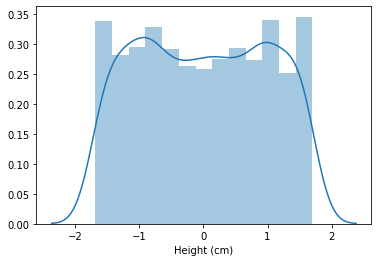

In [17]:
# you can create histograms of the numerical columns and such. 

sns.distplot(titanic_final['Height (cm)']);

# Graphics

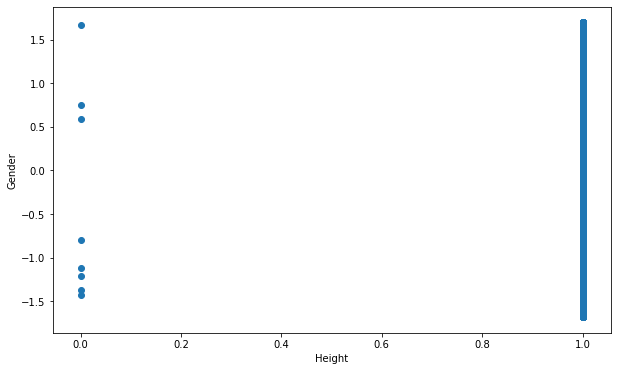

In [18]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(titanic_final['Count'], titanic_final['Height (cm)'])
ax.set_xlabel('Height')
ax.set_ylabel('Gender')
plt.show()

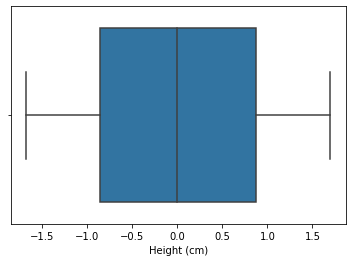

In [19]:
# This helps us find outliers.  You can also do a few other test like DFFITS or DFBETAS.  You also can use a Z score 

sns.boxplot(x=titanic_final['Height (cm)'])

In [20]:
# Can help you find outliers

zscore = stats.zscore(titanic_final['Height (cm)'])
outliers_high = zscore > 3
outliers_low = zscore < -3
print(np.unique(outliers_high))
print(np.unique(outliers_low))

[False]
[False]


# Correlation Plot Example

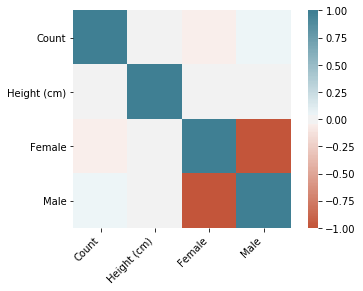

In [33]:
# Correlation Plots - these are good when you want to find a correlation between numeric columns.  

corr = titanic_final.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
# As you can see really there is no correlation between count and height 

# Interaction Plot Example

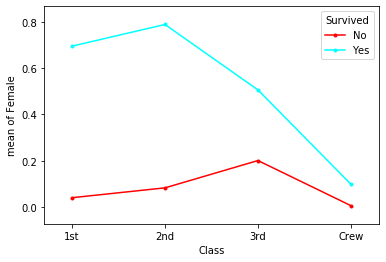

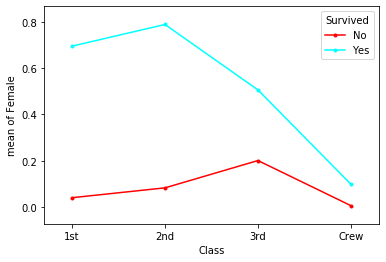

In [38]:
# These can help you see the relationships that the variables have with each other.

interaction_plot(titanic_final['Class'],titanic_final['Survived'], titanic_final['Female'])

## Summary

### In this analysis we learned how to perform EDA in python.  We went over some data cleaning and ML techniques, and overall descovered a lot about our dataset for future analysis.